In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [3]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end=end, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2026-01-13,95321.781250,95321.781250,96011.625000,90941.929688,91185.335938,54980674354
2026-01-14,96929.328125,96929.328125,97860.601562,94583.046875,95322.906250,60592490863
2026-01-15,95551.187500,95551.187500,97150.171875,95103.242188,96931.289062,53086363027
2026-01-16,95525.117188,95525.117188,95801.890625,94259.273438,95554.101562,33248170537
2026-01-17,95203.304688,95203.304688,95514.765625,95044.945312,95514.765625,26971234304


In [6]:
stock_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4.141000e+03
mean,27117.757428,27117.757428,27639.064335,26523.727284,27095.892959,2.169708e+10
std,31863.468654,31863.468654,32391.285380,31274.812642,31849.273083,2.288059e+10
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2721.790039,2721.790039,2808.760010,2653.939941,2716.879883,1.329760e+09
50%,10821.726562,10821.726562,11089.799805,10516.417969,10818.156250,1.713054e+10
75%,42520.402344,42520.402344,43319.722656,41692.968750,42499.335938,3.332743e+10
max,124752.531250,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4141 entries, 2014-09-17 to 2026-01-17
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  4141 non-null   float64
 1   (Close, BTC-USD)      4141 non-null   float64
 2   (High, BTC-USD)       4141 non-null   float64
 3   (Low, BTC-USD)        4141 non-null   float64
 4   (Open, BTC-USD)       4141 non-null   float64
 5   (Volume, BTC-USD)     4141 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 226.5 KB


In [8]:
stock_data.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [9]:
#Close Price data
closing_price = stock_data[['Close']]
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2026-01-13,95321.781250
2026-01-14,96929.328125
2026-01-15,95551.187500


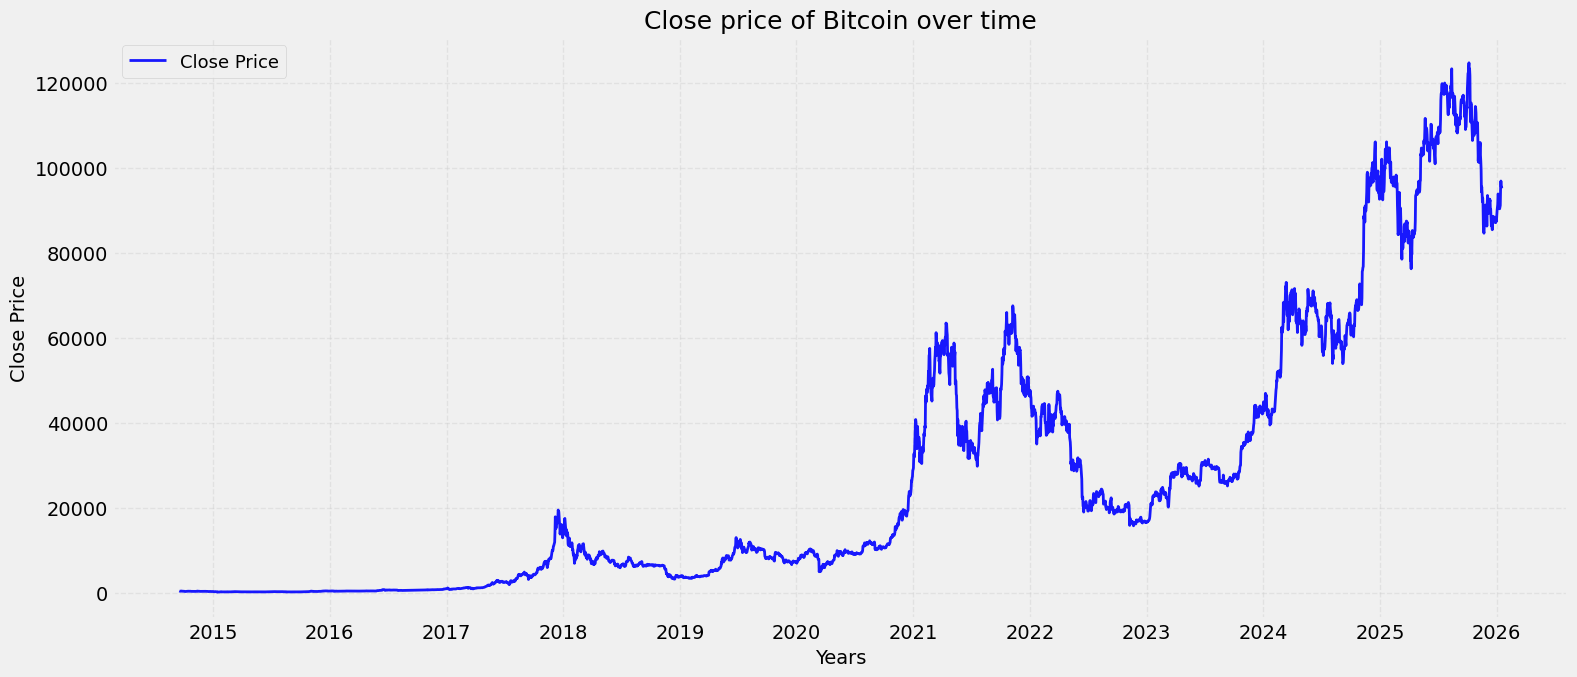

In [22]:
import matplotlib.dates as mdates

#Plot closing price with enchacement
plt.figure(figsize=(16,7))
plt.plot(closing_price.index, closing_price['Close'],
         label='Close Price',
         color='blue',
         linewidth=2,
         alpha=0.9)
plt.title("Close price of Bitcoin over time", fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [23]:
#Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
'''
moving average for 5 day -> null null null null 30.0 40.0
'''
print(sum(temp_data[1:6])/5)

40.0


In [24]:
df1 = pd.DataFrame(temp_data)

In [25]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [26]:
for i in range(2014, 2026):
  print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366
2025 365


In [27]:
closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()

/tmp/ipython-input-2942381381.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2942381381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



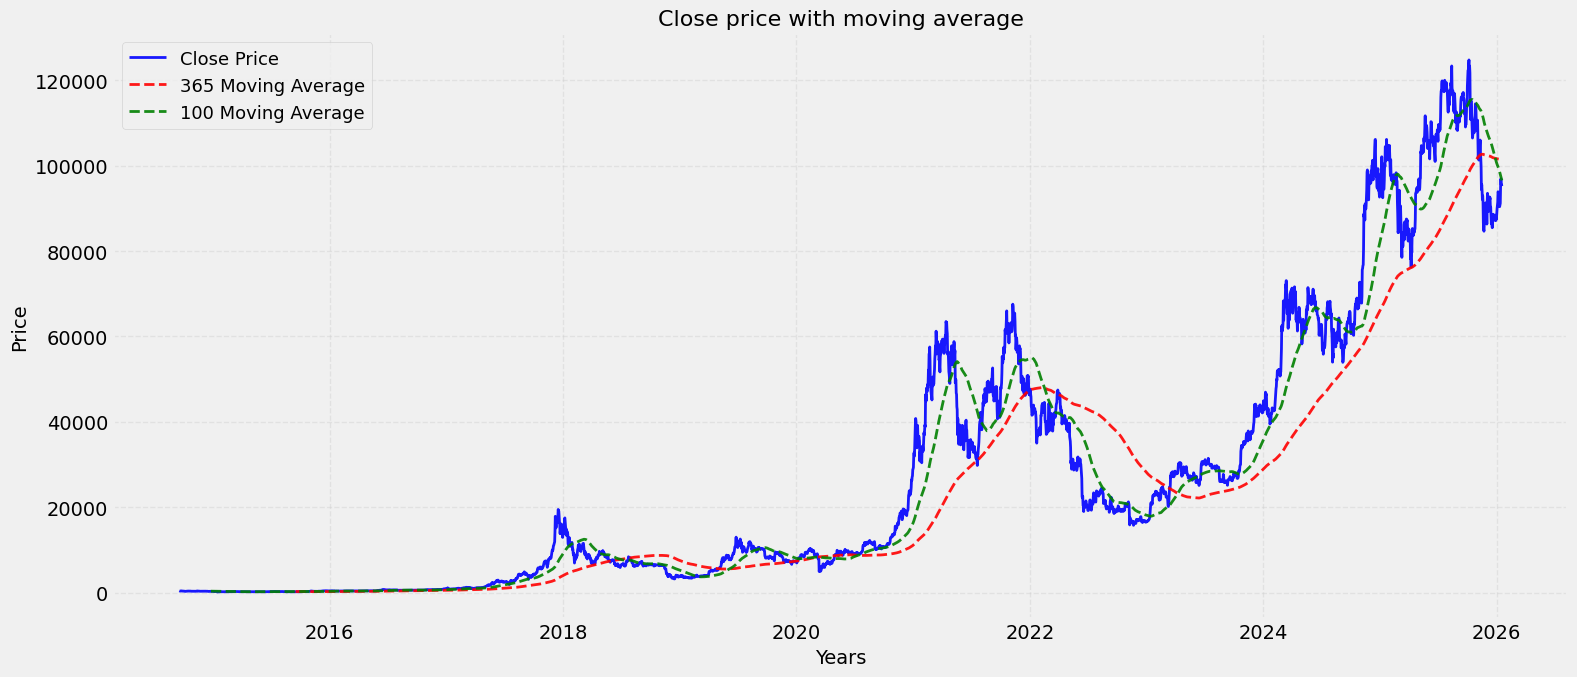

In [29]:
#Plot closing price with enchacement
plt.figure(figsize=(16,7))
plt.plot(closing_price.index, closing_price['Close'],
         label='Close Price',
         color='blue',
         linewidth=2,
         alpha=0.9)
plt.plot(closing_price.index, closing_price['MA_365'],
         label='365 Moving Average',
         color='red',
         linewidth=2,
         linestyle='--',
         alpha=0.9)
plt.plot(closing_price.index, closing_price['MA_100'],
         label='100 Moving Average',
         color='green',
         linewidth=2,
         linestyle='--',
         alpha=0.9)

plt.title("Close price with moving average", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [30]:
'''
LSTM -> Long short term memory
scale the data
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [31]:
scaled_data

array([[0.00224148],
       [0.00197743],
       [0.00173947],
       ...,
       [0.76559119],
       [0.76538191],
       [0.76279862]])

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [33]:
#Prepare data for LSTM
x_data = []
y_data = []
base_days = 100
for i in range(base_days, len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [34]:
#Split into train and test sets
train_size = int(len(x_data)*0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [35]:
model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=64, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - loss: 0.0016
Epoch 2/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - loss: 2.4479e-04
Epoch 3/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 62s 85ms/step - loss: 2.0225e-04
Epoch 4/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - loss: 1.5300e-04
Epoch 5/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 63s 87ms/step - loss: 1.2581e-04
Epoch 6/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - loss: 1.2340e-04
Epoch 7/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - loss: 1.1288e-04
Epoch 8/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - loss: 1.0726e-04
Epoch 9/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 63s 86ms/step - loss: 1.1541e-04
Epoch 10/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 62s 85ms/step - loss: 1.2109e-04


In [37]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


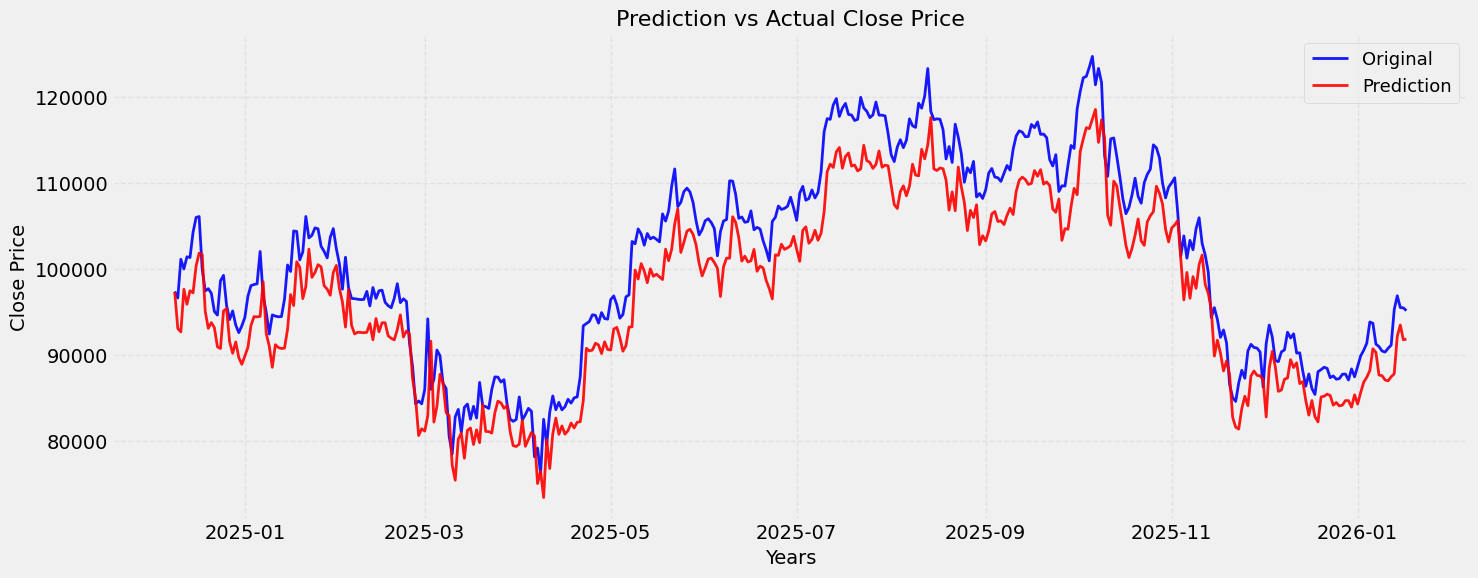

In [45]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten()
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'],
         label='Original',
         color='blue',
         linewidth=2,
         alpha=0.9)
plt.plot(plotting_data.index, plotting_data['Prediction'],
         label='Prediction',
         color='red',
         linewidth=2,
         alpha=0.9)

plt.title("Prediction vs Actual Close Price", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [39]:
#Predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predicttions = []

for _ in range(10):
  next_days = model.predict(last_100)
  future_predicttions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


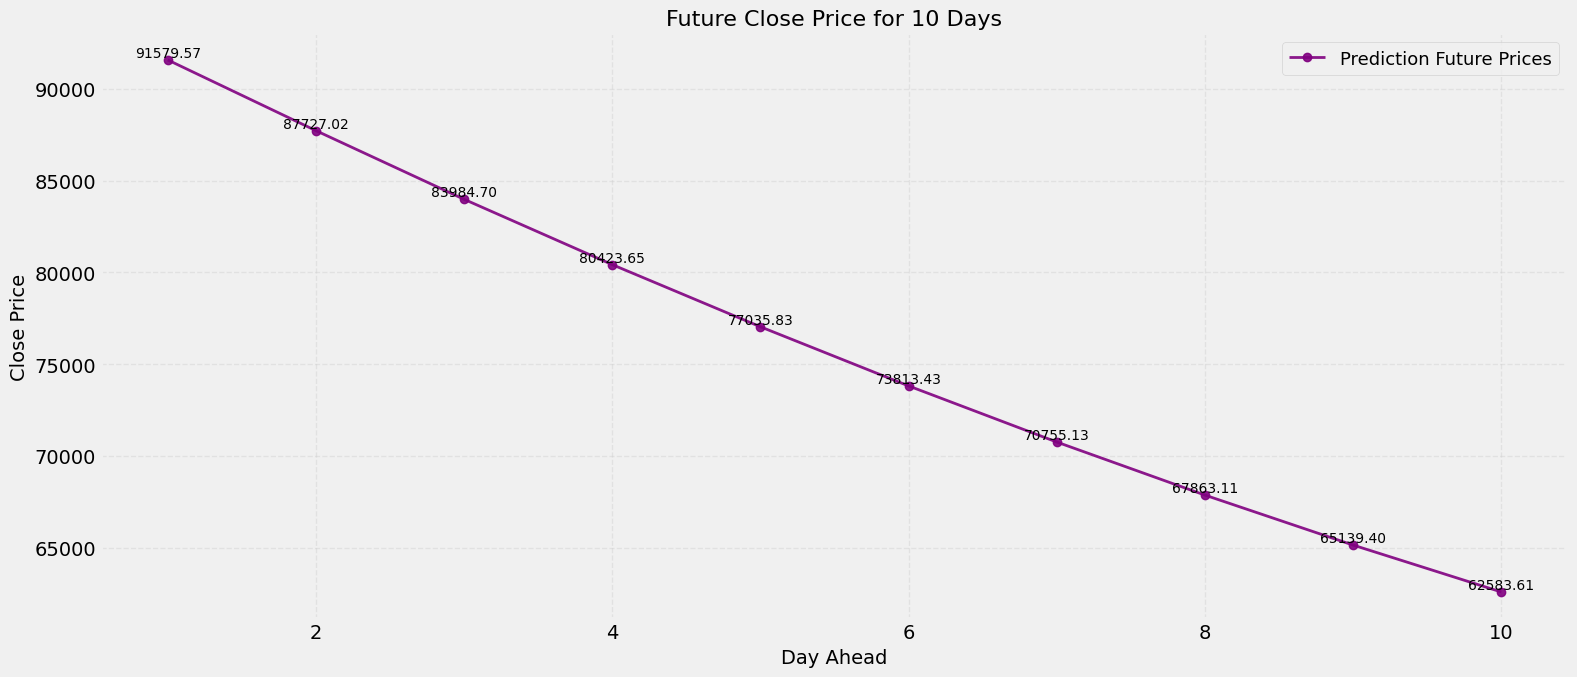

In [46]:
future_predicttions = np.array(future_predicttions).flatten()

plt.figure(figsize=(16,7))
plt.plot(range(1, 11), future_predicttions,
         marker="o",
         label='Prediction Future Prices',
         color='purple',
         linewidth=2,
         alpha=0.9)

for i, val in enumerate(future_predicttions):
  plt.text(i+1, val, f'{val:.2f}', fontsize=10, ha='center', va='bottom', color='black')

plt.title("Future Close Price for 10 Days", fontsize=16)
plt.xlabel("Day Ahead", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [47]:
model.save("model.keras")